In [1]:
import pandas as pd

In [8]:
col_title = "Title"
col_abstract = "Abstract"
col_abstract_clean = "Abstract Clean"
col_abstract_lemma = "Abstract Lemma"
col_publication_year= "Publication Year"
col_num_author = "Number of Authors"
col_geographic_term = "Geographic Term"
col_publisher= "Publisher"
col_published_on = "Published On"
col_conference = "Conference"
col_conference_location = "Conference Location"
col_volume = "Volume"
col_issue = "Issue"
col_type = "Type"
col_topic = "Topic"
col_topic_all = "Topic All"
col_geo_clean = col_geographic_term+"clean"
col_geo_sanitized = "Geographic term Sanitized"
col_country_sanitize = "Sanitize"
col_state_sanitize = "Sanitize State"
col_count_weight = "Count Weight"

In [10]:
table = pd.read_pickle('files/4.0 data_with_topic.pkl')
table.head()

,Abstract,Conference,Conference Location,EISSN,Geographic Term,ISSN,Issue,Language,Number of Authors,Publication Year,...,Title,Volume,Type,Abstract Clean,Abstract Lemma,Topic Most Probable,Topic All,Geographic Termclean,Sanitize,Sanitize State
0,Aviation provides productivity in the form of ...,26th International Congress of the Aeronautica...,United States,NaN,[],NaN,NaN,English,4,20080000.0,...,Payload Fuel Energy Efficiency as a Metric for...,NaN,Conference,Aviation provides productivity in the form of ...,aviation provide productivity form transport p...,6,"[0.00037735849056616045, 0.0003773584905661604...",[],[],[]
8,Steam traction was never fully developed befor...,"CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[],NaN,None,NaN,1,20080000.0,...,Feasibility of steam traction for coal transpo...,None,Conference,Steam traction was never fully developed befor...,steam traction be never fully develop be super...,29,"[0.0001652892561983984, 0.0001652892561983984,...",[Argentina],[Argentina],[]
9,The Transport Infrastructure Development Corpo...,"CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[Australia],NaN,None,NaN,1,20080000.0,...,Operational readiness - making it happen,None,Conference,The Transport Infrastructure Development Corpo...,transport infrastructure development corporati...,37,"[0.0004651162790698748, 0.0004651162790698748,...",[Australia],[Australia],[]
10,At CORE 2004 the authors presented a first pap...,"CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[Australia],NaN,None,NaN,2,20080000.0,...,Noise reducing slab track for the Epping to Ch...,None,Conference,At CORE the authors presented a first paper on...,core author present first paper control noise ...,10,"[0.00012820512820518583, 0.0840320449597445, 0...",[Australia],[Australia],[]
11,"Due to the daily congestion of highways, railw...","CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[Australia],NaN,None,NaN,1,20080000.0,...,Investigation into some design aspects of ball...,None,Conference,Due to the daily congestion of highways railwa...,daily congestion highway railway have become m...,20,"[0.00014925373134334178, 0.0001492537313433417...",[Australia],[Australia],[]


In [11]:
del table[col_abstract]

In [12]:
del table[col_abstract_clean]

In [13]:
len(table)

146972

In [14]:
# create duplicate rows for each country
#newTable = table[table[len(table[col_country_sanitize]) == 2]]

#for i, row in newTable.iterrows():
    

newTable = table[table[col_country_sanitize].apply(lambda x: len(x) >0)]

In [15]:
print(len(newTable))
len(table)

55750


146972

In [19]:
myTable = []
for i, row in newTable.iterrows():
    countries = row[col_country_sanitize].copy()
    count_countries = len(countries)
    weights = row[col_topic_all]
    row[col_topic_all] = [w / count_countries for w in weights]
    weight = 1/count_countries
    for c in countries:
        d = {col_country_sanitize: c, col_count_weight: weight}
        for i, w in enumerate(weights):
            d[f"Topic {i}"] = w/count_countries
        myTable.append(d)
myTable = pd.DataFrame(myTable)

In [21]:
myTable.head(10)

,Sanitize,Count Weight,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
0,Argentina,1.0,0.000165,0.000165,0.000165,0.000165,0.000165,0.000165,0.102213,0.000165,...,0.000165,0.000165,0.014040,0.000165,0.000165,0.000165,0.000165,0.000165,0.000165,0.000165
1,Australia,1.0,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,...,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.049262
2,Australia,1.0,0.000128,0.084032,0.000128,0.000128,0.066768,0.080266,0.000128,0.000128,...,0.000128,0.000128,0.000128,0.000128,0.000128,0.019083,0.000128,0.000128,0.000128,0.000128
3,Australia,1.0,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,...,0.000149,0.000149,0.000149,0.000149,0.000149,0.061865,0.000149,0.000149,0.020329,0.000149
4,Australia,1.0,0.000227,0.000227,0.000227,0.024152,0.031005,0.000227,0.000227,0.000227,...,0.000227,0.000227,0.000227,0.000227,0.000227,0.115871,0.000227,0.000227,0.000227,0.000227
5,Australia,1.0,0.000206,0.000206,0.000206,0.000206,0.000206,0.000206,0.000206,0.064110,...,0.000206,0.000206,0.000206,0.000206,0.000206,0.235303,0.000206,0.000206,0.000206,0.000206
6,Australia,1.0,0.000426,0.000426,0.000426,0.000426,0.000426,0.000426,0.000426,0.000426,...,0.000426,0.000426,0.000426,0.000426,0.028668,0.000426,0.000426,0.000426,0.000426,0.000426
7,India,1.0,0.023254,0.000227,0.000227,0.000227,0.019838,0.033078,0.000227,0.000227,...,0.000227,0.000227,0.000227,0.015637,0.000227,0.000227,0.000227,0.000227,0.000227,0.000227
8,Australia,1.0,0.161480,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,...,0.066244,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.000233,0.103051
9,Australia,1.0,0.000189,0.064575,0.143228,0.000189,0.040775,0.000189,0.000189,0.000189,...,0.000189,0.000189,0.075356,0.000189,0.029715,0.000189,0.045682,0.000189,0.000189,0.000189


In [34]:
myTable.to_pickle("files/6.2 single_country_all_topics.pkl")

In [22]:
sum_by_group = myTable.groupby([col_country_sanitize])[["Topic "+str(x) for x in range(50)]].sum()

In [23]:
sum_by_group

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
Sanitize,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.441427,0.202955,0.042366,0.008791,0.026165,0.001766,0.017139,0.001766,0.052521,0.001766,...,0.400997,0.001766,0.596708,0.074593,0.082674,0.167624,0.008523,0.001766,0.246124,0.257638
Albania,0.035208,0.001607,0.013526,0.037596,0.001607,0.079897,0.046873,0.004127,0.439186,0.001607,...,0.372281,0.595507,0.539607,0.028816,0.457036,0.001607,0.109414,0.001607,0.205079,0.429921
Algeria,0.052658,0.216696,0.876414,0.118908,0.137330,0.074434,0.254355,0.067052,0.242018,0.043878,...,0.142706,0.011216,0.493041,0.003780,0.227215,0.162349,0.732528,0.814026,0.116799,1.047120
Andorra,0.000479,0.000479,0.000479,0.004723,0.000479,0.000479,0.449405,0.000479,0.049766,0.000479,...,0.243389,0.000479,0.005794,0.000479,0.090118,0.013421,0.000479,0.049351,0.005800,0.185096
Angola,0.003742,0.003742,0.003742,0.052131,0.003742,0.003742,0.003742,0.003742,0.156458,0.003742,...,0.003742,0.003742,0.003742,0.003742,0.154425,0.003742,0.026228,0.017621,0.003742,0.147047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,0.000211,0.000211,0.000211,0.000211,0.000211,0.035030,0.000211,0.000211,0.000211,0.000211,...,0.000211,0.019763,0.000211,0.000211,0.000211,0.000211,0.082277,0.014309,0.000211,0.000211
Vietnam,0.523184,0.811459,1.962473,1.093909,0.280152,0.628948,0.602860,0.537624,3.839919,0.980285,...,1.172535,1.940167,6.584411,0.553755,2.772537,2.768145,1.614616,0.154427,1.243174,2.879915
Yemen,0.000607,0.000607,0.000607,0.000607,0.000607,0.020347,0.000607,0.000607,0.000607,0.000607,...,0.000607,0.000607,0.000607,0.000607,0.057903,0.000607,0.000607,0.230079,0.000607,0.000607


In [24]:
sum_by_group['Sum Weight'] = sum_by_group.sum(axis=1)

In [25]:
sorted_top_countries = sum_by_group.sort_values(by = ['Sum Weight'], ascending=False)[:50]

In [26]:
pivot_table = sorted_top_countries.loc[:, sorted_top_countries.columns != 'Sum Weight'].div(sorted_top_countries["Sum Weight"], axis=0)

In [27]:
pivot_table.index.rename("Countries", inplace = True)
pivot_table

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
Countries,,,,,,,,,,,,,,,,,,,,,
United States,0.010909,0.012325,0.025313,0.018215,0.004997,0.017728,0.009853,0.010210,0.013949,0.007778,...,0.014068,0.011723,0.020896,0.014692,0.027912,0.017532,0.011709,0.018534,0.063156,0.030179
China,0.011368,0.009874,0.015628,0.018237,0.006052,0.041194,0.010950,0.014375,0.037386,0.018014,...,0.015003,0.008554,0.018663,0.015534,0.030063,0.026974,0.011376,0.009935,0.015098,0.065259
Australia,0.016956,0.010618,0.021875,0.015600,0.003970,0.007330,0.005910,0.006628,0.009299,0.003994,...,0.006315,0.017413,0.063601,0.013396,0.026099,0.007676,0.012358,0.010767,0.011779,0.025489
Canada,0.007830,0.009894,0.017553,0.016320,0.003387,0.012005,0.005720,0.009704,0.011632,0.009348,...,0.009013,0.023678,0.023170,0.012157,0.032650,0.011299,0.010129,0.031554,0.042221,0.026735
United Kingdom,0.012677,0.004348,0.010584,0.016250,0.006504,0.011246,0.010254,0.010003,0.012524,0.006869,...,0.009083,0.015832,0.032309,0.009728,0.022044,0.006200,0.018744,0.004144,0.016279,0.023649
Japan,0.032025,0.016172,0.023335,0.019079,0.008388,0.016661,0.014295,0.019463,0.017067,0.012845,...,0.014723,0.005358,0.019444,0.011670,0.023506,0.010830,0.014584,0.005101,0.009924,0.033922
India,0.008802,0.005572,0.007705,0.016008,0.004727,0.016191,0.008627,0.011205,0.022564,0.007241,...,0.009178,0.008583,0.017639,0.014779,0.026461,0.008040,0.014313,0.019245,0.021857,0.039137
Netherlands,0.020731,0.006516,0.006813,0.029232,0.005169,0.037716,0.007870,0.010424,0.018629,0.005700,...,0.008641,0.017538,0.028261,0.010555,0.023934,0.002844,0.015674,0.008979,0.004951,0.031288
Sweden,0.020359,0.006103,0.007372,0.018841,0.004745,0.017535,0.012798,0.008704,0.012370,0.009804,...,0.008912,0.008100,0.040541,0.014373,0.017763,0.004453,0.019160,0.006798,0.008551,0.030107


In [28]:
sorted_top_countries[:10]

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Sum Weight
Countries,,,,,,,,,,,,,,,,,,,,,
United States,197.396475,223.020355,458.026592,329.584263,90.417092,320.785985,178.291977,184.737531,252.403077,140.738769,...,212.119622,378.104410,265.846057,505.060425,317.235990,211.872986,335.370507,1142.773013,546.071957,18094.491021
China,77.556692,67.360648,106.616156,124.417781,41.285868,281.032581,74.700419,98.066502,255.058237,122.897477,...,58.355427,127.325312,105.976351,205.094707,184.025352,77.612101,67.776258,102.999059,445.214326,6822.228943
Australia,67.177548,42.070300,86.667074,61.806590,15.728799,29.041143,23.415383,26.260952,36.841878,15.824092,...,68.989218,251.985533,53.074306,103.405384,30.412918,48.963636,42.656864,46.668184,100.985632,3961.982677
Canada,28.077896,35.478765,62.939881,58.519073,12.146283,43.048303,20.512011,34.796391,41.711047,33.520205,...,84.904039,83.081813,43.590457,117.074763,40.513792,36.318341,113.145730,151.393362,95.864116,3585.754874
United Kingdom,24.545397,8.418543,20.491899,31.463057,12.592707,21.773680,19.853998,19.367285,24.249551,13.299288,...,30.653795,62.556897,18.835532,42.680901,12.004772,36.291983,8.023695,31.519217,45.788084,1936.187612
Japan,42.257753,21.340071,30.791960,25.176175,11.068423,21.985418,18.862790,25.682895,22.520515,16.949126,...,7.069523,25.656849,15.399268,31.017722,14.291246,19.244628,6.730398,13.094781,44.760884,1319.542807
India,10.267866,6.500044,8.988162,18.673907,5.514729,18.887011,10.064068,13.071328,26.321787,8.446701,...,10.012556,20.576045,17.240217,30.867713,9.378453,16.696506,22.450585,25.496684,45.654546,1166.538492
Netherlands,23.304781,7.324563,7.658293,32.860768,5.811091,42.398114,8.847409,11.718414,20.941094,6.407635,...,19.715029,31.769811,11.865122,26.904664,3.196796,17.619408,10.093700,5.566020,35.172160,1124.141443
Sweden,20.744052,6.218692,7.511463,19.197549,4.834875,17.866597,13.040336,8.868629,12.603775,9.989403,...,8.253018,41.307705,14.644662,18.098754,4.537643,19.522118,6.926995,8.713197,30.676265,1018.914856


In [29]:
df_distribution = sorted_top_countries.loc[:, sorted_top_countries.columns != 'Sum Weight'][:3]
df_distribution = df_distribution.unstack().reset_index(name='value')
df_distribution.rename(columns={'level_0': 'Topic'}, inplace=True)
df_distribution

,Topic,Countries,value
0,Topic 0,United States,197.396475
1,Topic 0,China,77.556692
2,Topic 0,Australia,67.177548
3,Topic 1,United States,223.020355
4,Topic 1,China,67.360648
...,...,...,...
145,Topic 48,China,102.999059
146,Topic 48,Australia,46.668184
147,Topic 49,United States,546.071957
148,Topic 49,China,445.214326


In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
import seaborn as sns

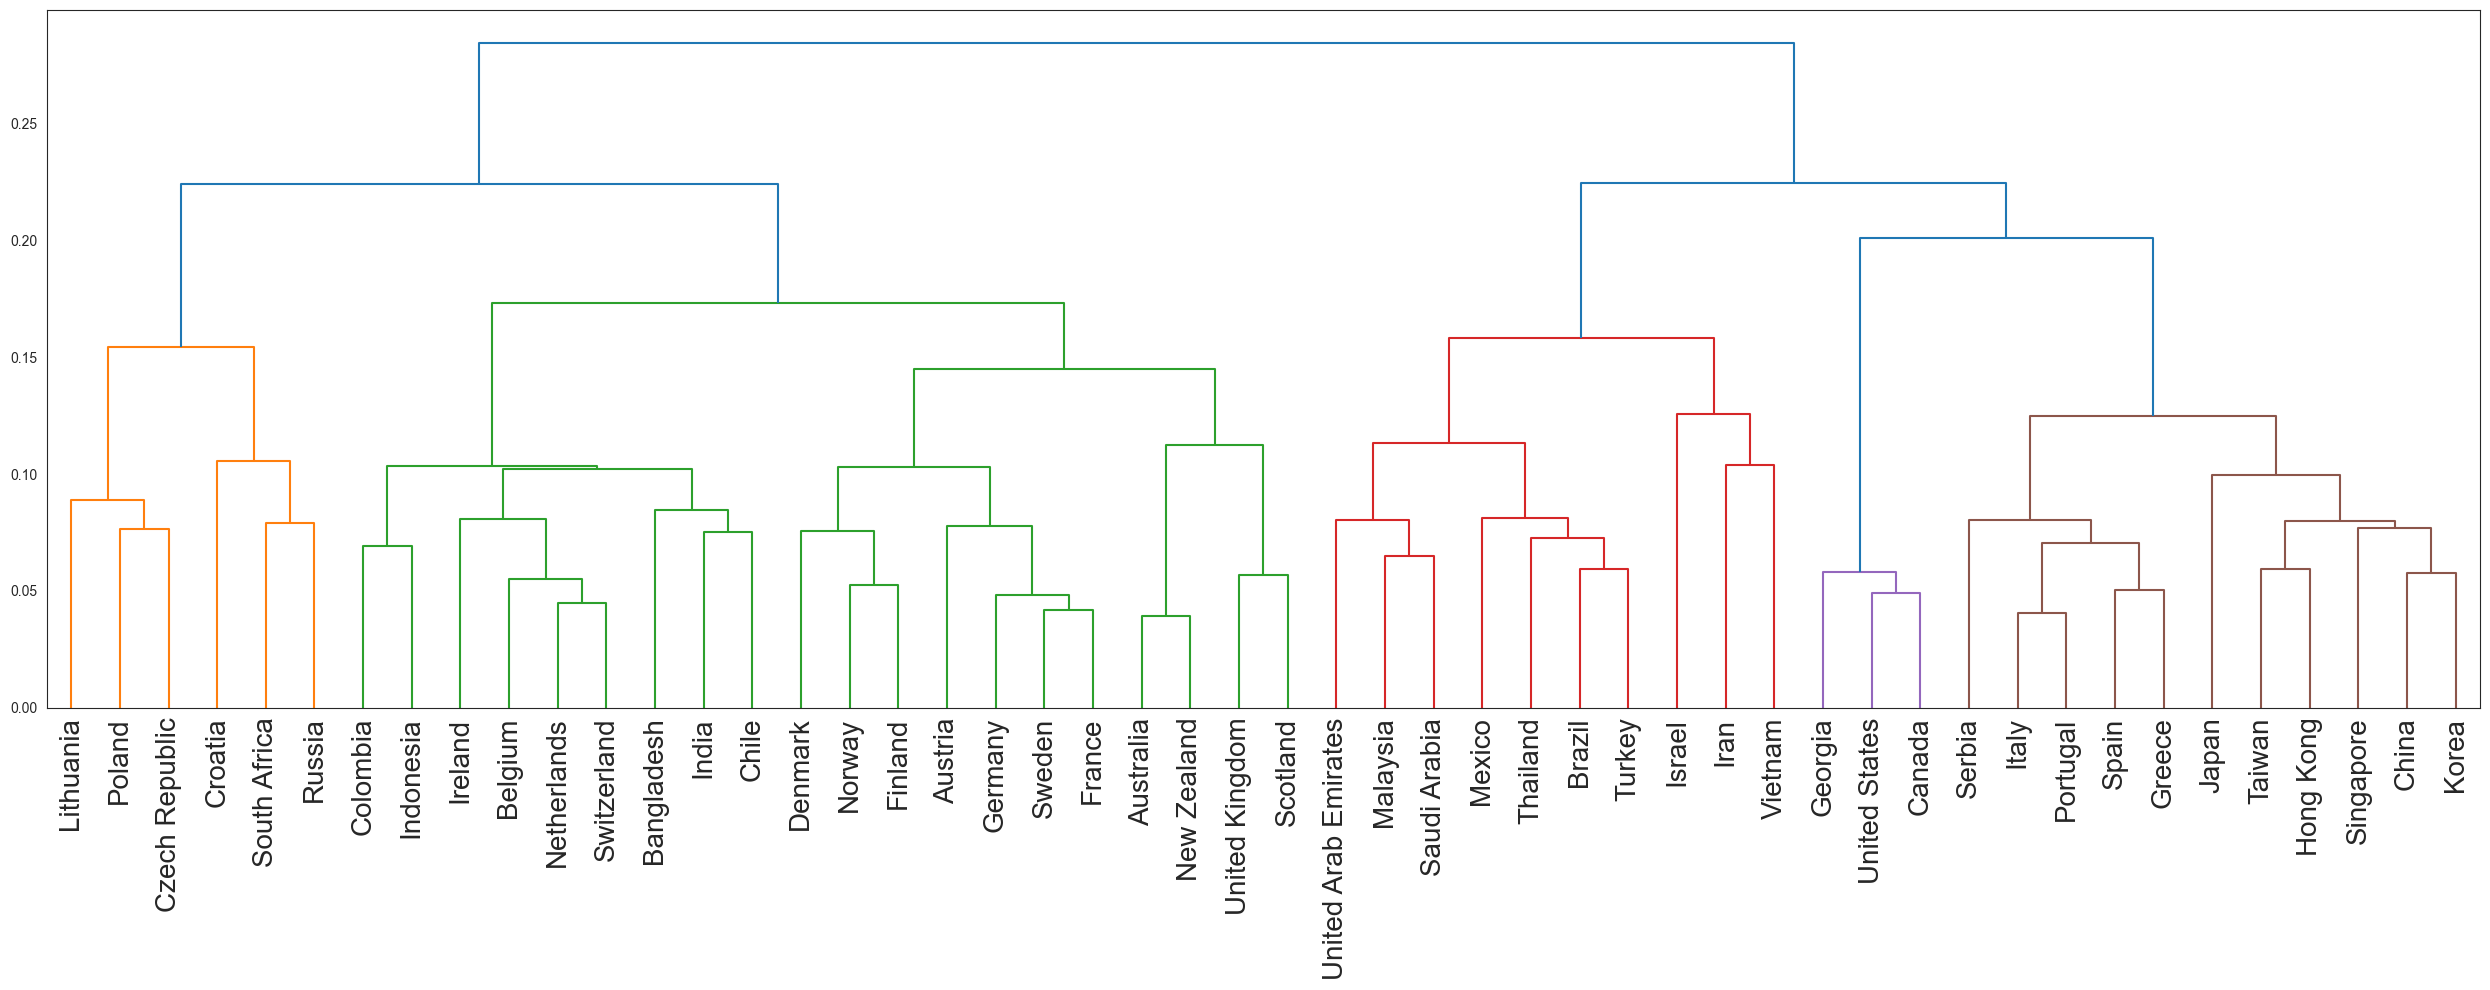

In [35]:
sns.set_style("white")
A = hierarchy.linkage(pivot_table, 'ward')
fig = plt.figure(figsize=(25, 10))
 
# Plot with Custom leaves
dn = hierarchy.dendrogram(A, leaf_rotation=90, leaf_font_size=20,labels=pivot_table.index)
plt.tight_layout()
plt.savefig('fig/6.2 Country dendrogram.svg', format='svg', dpi=500)
plt.savefig('fig/6.2 Country dendrogram.pdf', format='pdf', dpi=500)
plt.show()